In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import plotly.graph_objects as go 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
DataSet=pd.read_csv('BTC-USD_LAST_30_DAYS.csv')

In [17]:
DataSet

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-17,61529.921875,62572.175781,60361.351563,60683.820313,60683.820313,66138759198
1,2021-04-18,60701.886719,61057.457031,52829.535156,56216.183594,56216.183594,97468872758
2,2021-04-19,56191.585938,57520.054688,54368.593750,55724.265625,55724.265625,65344865159
3,2021-04-20,55681.792969,57062.148438,53448.046875,56473.031250,56473.031250,67849323955
4,2021-04-21,56471.128906,56757.972656,53695.468750,53906.089844,53906.089844,54926612466
5,2021-04-22,53857.105469,55410.230469,50583.812500,51762.273438,51762.273438,74798630778
6,2021-04-23,51739.808594,52120.792969,47714.664063,51093.652344,51093.652344,86668667320
7,2021-04-24,51143.226563,51167.562500,48805.285156,50050.867188,50050.867188,49014494781
8,2021-04-25,50052.832031,50506.019531,47159.484375,49004.253906,49004.253906,46117114240
9,2021-04-26,49077.792969,54288.003906,48852.796875,54021.753906,54021.753906,58284039825


In [19]:
fig = go.Figure(data=[go.Candlestick(x=DataSet['Date'],
                open=DataSet['Open'], high=DataSet['High'],
                low=DataSet['Low'], close=DataSet['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False)  
fig.show()



### Periodo desde o inicio do IPO do bitcoin 

In [20]:
DataSet=pd.read_csv('BTC-USD_ALL_TIME.csv')
DataSet=DataSet.dropna()
DataSet

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2399,2021-04-12,60175.945313,61253.035156,59589.875000,59893.453125,59893.453125,5.182869e+10
2400,2021-04-13,59890.019531,63742.285156,59869.957031,63503.457031,63503.457031,6.998345e+10
2401,2021-04-14,63523.753906,64863.097656,61554.796875,63109.695313,63109.695313,7.745178e+10
2402,2021-04-15,63075.195313,63821.671875,62208.964844,63314.011719,63314.011719,6.095438e+10


In [21]:
DataSet.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2.400000e+03
mean,6780.803613,6971.723456,6587.710287,6805.160931,6805.160931,1.162130e+10
std,10112.349011,10436.785739,9787.653021,10170.827904,10170.827904,1.848013e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,455.097260,459.254242,448.947510,455.068985,455.068985,6.751778e+07
50%,4098.749267,4210.345704,4007.764160,4106.032226,4106.032226,3.775635e+09
75%,8926.842774,9178.591064,8765.122070,8927.187256,8927.187256,1.757370e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


### Inicialmente iremos criar uma RNN baseada apenas no Valor de Abertura

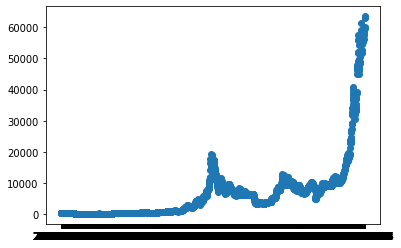

In [22]:
plt.scatter(DataSet['Date'],DataSet['Open'],)
plt.show()

base_treinamento = DataSet.iloc[:, 1:2].values

In [ ]:
base_treinamento

array([[ 5.330769],
       [ 5.388461],
       [ 5.346153],
       ...,
       [38.125   ],
       [37.919998],
       [37.904999]])

### Normalizar os dados da ação

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
DataScaled=scaler.fit_transform(base_treinamento)

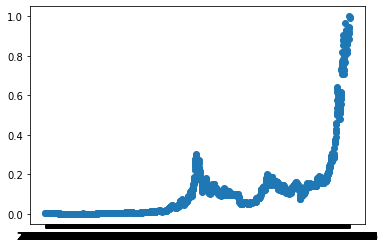

[[0.00456166]
 [0.00441952]
 [0.00390242]
 ...
 [1.        ]
 [0.99291901]
 [0.99581274]]


In [24]:
plt.scatter(DataSet['Date'],DataScaled,)
plt.show()
print(DataScaled)

### Definição dos previsores

In [25]:
previsores = []
preco_real = []
NRecursao = 90
DataSetLen = len(DataScaled) #quantidade de dados no dataset
print(DataSetLen)

2400


In [26]:

for i in range(NRecursao, DataSetLen):
    previsores.append(DataScaled[i-NRecursao:i,0])
    preco_real.append(DataScaled[i,0])

previsores, preco_real = np.array(previsores), np.array(preco_real)

In [27]:
previsores.shape

(2310, 90)

### Transformar para o formato do Tensor do Keras

In [29]:
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

In [30]:
previsores.shape

(2310, 90, 1)

### Estrutura da Rede Neural

In [31]:
# Camada de entrada
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1], 1)))
regressor.add(Dropout(0.3))

# Cada Oculta 1
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

# Cada Oculta 2
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

# Cada Oculta 3
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

# Camada de Saída
regressor.add(Dense(units = 1, activation = 'linear'))


### Construindo a Rede

In [32]:
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
                  metrics = ['mean_absolute_error'])
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32)

Epoch 1/100
73/73 [==============================] - 21s 194ms/step - loss: 0.0106 - mean_absolute_error: 0.0571
Epoch 2/100
73/73 [==============================] - 15s 211ms/step - loss: 0.0030 - mean_absolute_error: 0.0316
Epoch 3/100
73/73 [==============================] - 15s 207ms/step - loss: 0.0038 - mean_absolute_error: 0.0327
Epoch 4/100
73/73 [==============================] - 15s 206ms/step - loss: 0.0022 - mean_absolute_error: 0.0276
Epoch 5/100
73/73 [==============================] - 15s 205ms/step - loss: 0.0024 - mean_absolute_error: 0.0281
Epoch 6/100
73/73 [==============================] - 15s 210ms/step - loss: 0.0017 - mean_absolute_error: 0.0246
Epoch 7/100
73/73 [==============================] - 15s 210ms/step - loss: 0.0019 - mean_absolute_error: 0.0230
Epoch 8/100
73/73 [==============================] - 15s 205ms/step - loss: 0.0018 - mean_absolute_error: 0.0234
Epoch 9/100
73/73 [==============================] - 15s 211ms/step - loss: 0.0015 - mean_absolu

### Conjunto de dados para o Teste

In [33]:
DataSet_teste=pd.read_csv('BTC-USD_LAST_30_DAYS.csv')

preco_real_teste = DataSet_teste.iloc[:, 1:2].values

base_completa = pd.concat((DataSet['Open'], DataSet_teste['Open']), axis = 0)
entradas = base_completa[len(base_completa) - len(DataSet_teste) - NRecursao:].values

entradas = entradas.reshape(-1, 1)
entradas = scaler.transform(entradas)

In [34]:
DataSetTestLen = len(DataSet_teste)
NPredictions = 90

X_teste = []
for i in range(NRecursao, DataSetTestLen+NRecursao):
    X_teste.append(entradas[i-NRecursao:i, 0])
    
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

previsoes = regressor.predict(X_teste)
previsoes = scaler.inverse_transform(previsoes)


In [35]:
RNN=[]
predictions_teste=X_teste[0].T
predictions_teste=np.reshape(predictions_teste, (predictions_teste.shape[0], predictions_teste.shape[1], 1))

predictions_teste[0][NRecursao-1][0]=regressor.predict(predictions_teste)[0][0]
RNN.append(regressor.predict(predictions_teste)[0])

for i in range(NPredictions-1):
    predictions_teste=np.roll(predictions_teste,-1)
    predictions_teste[0][NRecursao-1][0]=regressor.predict(predictions_teste)[0][0]
    RNN.append(regressor.predict(predictions_teste)[0])
RNN = scaler.inverse_transform(RNN)

print(RNN.mean())
print(previsoes.mean())
print(preco_real_teste.mean())

52884.49341071593
55911.254
54512.01386112903


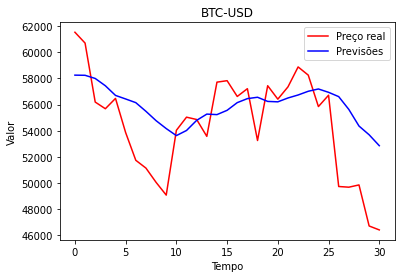

In [36]:
plt.plot(preco_real_teste, color = 'red', label = 'Preço real')
plt.plot(previsoes, color = 'blue', label = 'Previsões')

plt.title('BTC-USD')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()